In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import csv
from scipy.optimize import *
from numpy.lib.recfunctions import *
from utils import *
from data import *

In [2]:
# Print data columns
x.dtype.names

('measure_new_score',
 'classification',
 'classification_longliner',
 'classification_purse_seine',
 'speed',
 'measure_coursestddev',
 'measure_speedstddev',
 'measure_speedavg',
 'distance_to_shore')

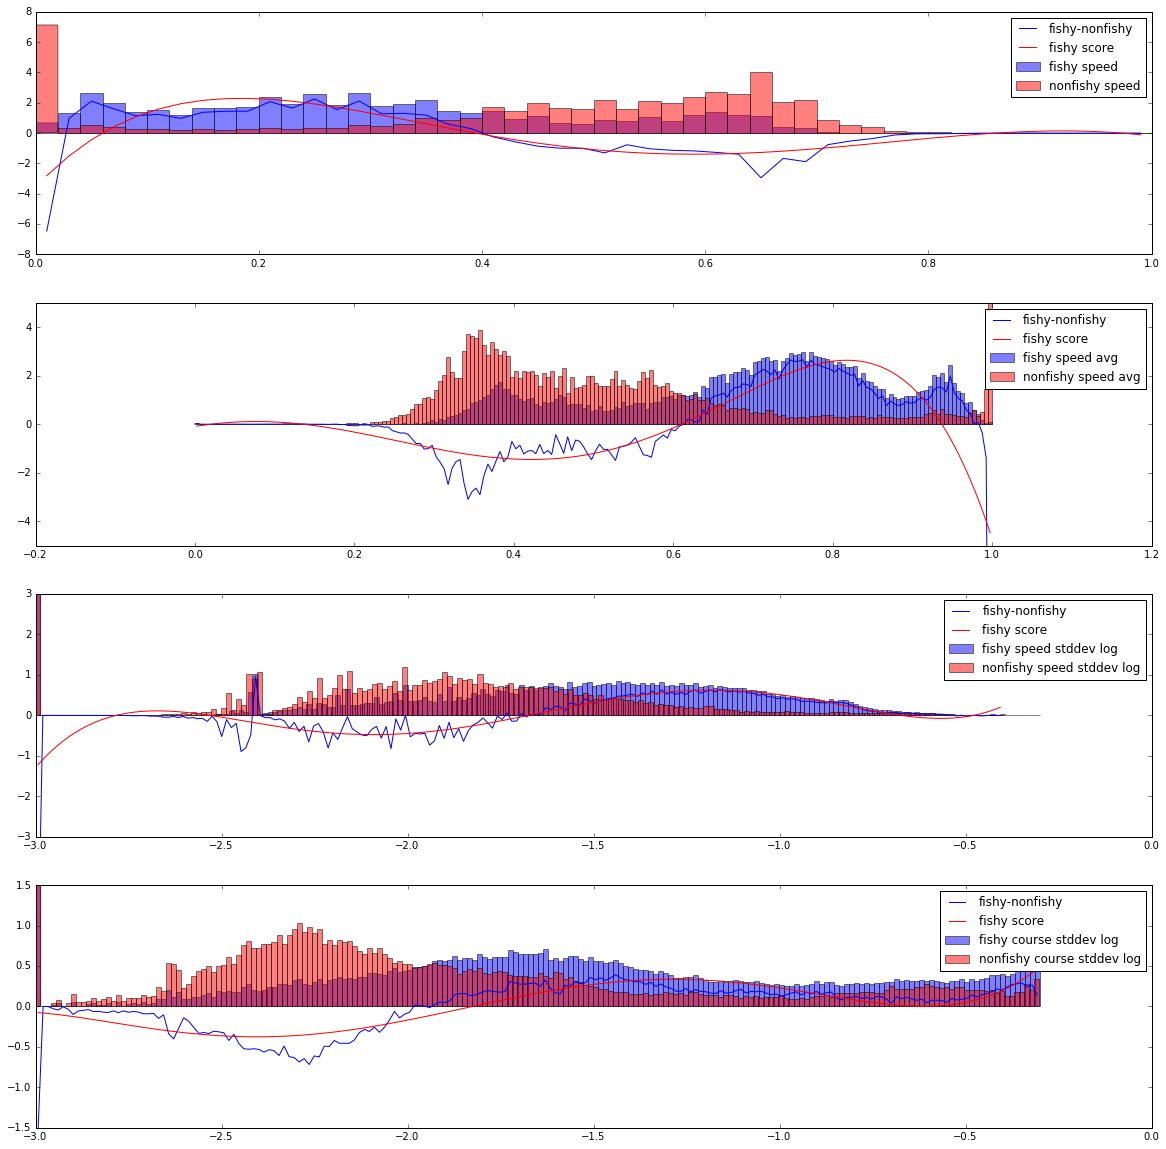

In [3]:
histfix = figure(figsize=(20,20))

histfix.add_subplot(411)

xfishy_hist = center_hist_bins(hist(clamp(xfishy["speed"]/17, 0, 1), bins=50, normed=True, color='b', alpha=0.5, label="fishy speed"))
xnonfishy_hist = center_hist_bins(hist(clamp(xnonfishy["speed"]/17, 0, 1), bins=50, normed=True, color='r', alpha=0.5, label="nonfishy speed"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

speed_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *speed_args) for value in x_hist[1]], color='r', label='fishy score')

legend()



histfix.add_subplot(412).set_ylim(-5, 5)

xfishy_hist = center_hist_bins(hist(xfishy["measure_speedavg"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed avg"))
xnonfishy_hist = center_hist_bins(hist(xnonfishy["measure_speedavg"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed avg"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

measure_speedavg_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *measure_speedavg_args) for value in x_hist[1]], color='r', label='fishy score')

legend()



histfix.add_subplot(413).set_ylim(-3, 3)

xfishy_hist = center_hist_bins(hist(log10(xfishy["measure_speedstddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log"))
xnonfishy_hist = center_hist_bins(hist(log10(xnonfishy["measure_speedstddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

measure_speedstddev_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *measure_speedstddev_args) for value in x_hist[1]], color='r', label='fishy score')

legend()



histfix.add_subplot(414).set_ylim(-1.5, 1.5)

xfishy_hist = center_hist_bins(hist(log10(xfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log"))
xnonfishy_hist = center_hist_bins(hist(log10(xnonfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

measure_coursestddev_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *measure_coursestddev_args) for value in x_hist[1]], color='r', label='fishy score')

legend()


show()



In [5]:
try:
    x = append_fields(x, 'score_speed', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_speedavg', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_speedstddev', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_coursestddev', [], dtypes='<f8', fill_value=0.0)
except:
    pass

x['score_speed'][:] = polynomial(clamp(x["speed"]/17, 0, 1), *speed_args)
x['score_speedavg'][:] = polynomial(x["measure_speedavg"], *measure_speedavg_args)
x['score_speedstddev'][:] = polynomial(log10(x["measure_speedstddev"]+0.001), *measure_speedstddev_args)
x['score_coursestddev'][:] = polynomial(log10(x["measure_coursestddev"]+0.001), *measure_coursestddev_args)

xfishy = fishy(x)
xnonfishy = nonfishy(x)

In [8]:
score_args = curve_fit(linear, (x['score_speed'], x['score_speedavg'], x['score_speedstddev'], x['score_coursestddev']), x['classification'], [1]*4)[0]

try:
    x = append_fields(x, 'score', [], dtypes='<f8', fill_value=0.0)
except:
    pass

x['score'][:] = linear((x['score_speed'], x['score_speedavg'], x['score_speedstddev'], x['score_coursestddev']), *score_args)

xfishy = fishy(x)
xnonfishy = nonfishy(x)


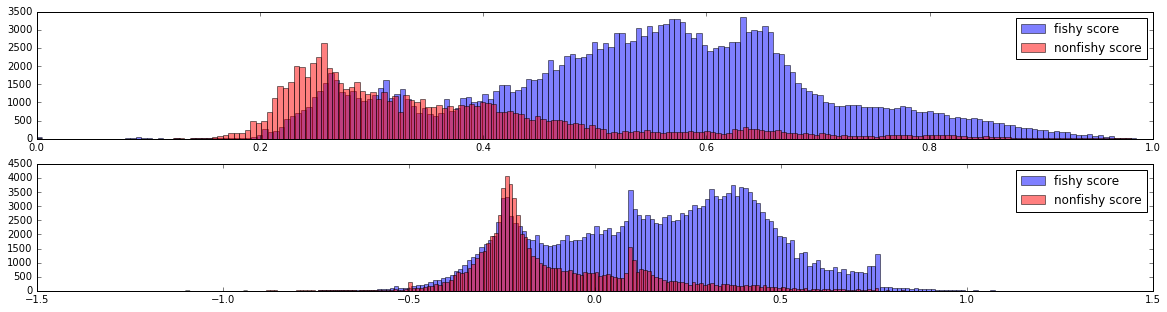

In [9]:
histfig = figure(figsize=(20,5))

subplot = histfig.add_subplot(211)
new_score_fishy = subplot.hist(xfishy["measure_new_score"][xfishy['distance_to_shore'] > 3], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
new_score_nonfishy = subplot.hist(xnonfishy["measure_new_score"][xnonfishy['distance_to_shore'] > 3], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(212)
score_fishy = subplot.hist(xfishy["score"][xfishy['distance_to_shore'] > 3], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
score_nonfishy = subplot.hist(xnonfishy["score"][xnonfishy['distance_to_shore'] > 3], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()


show()

In [14]:
total = sum(new_score_fishy[0] + new_score_nonfishy[0])
non_overlap = sum(abs(new_score_fishy[0] - new_score_nonfishy[0]))
overlap = total - non_overlap
error = overlap / total

print "Error for measure_new_score: %s%%" % (error * 100)


total = sum(score_fishy[0] + score_nonfishy[0])
non_overlap = sum(abs(score_fishy[0] - score_nonfishy[0]))
overlap = total - non_overlap
error = overlap / total

print "Error for score: %s%%" % (error * 100)


Error for measure_new_score: 42.1735850097%
Error for score: 41.0911333359%


102